<a href="https://colab.research.google.com/github/EnochYounceSAIC/FiberOptics/blob/main/weekthree/channels_and_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Functions and instantiations

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
length = 3000
span = 100
sps = 50
symbol_rate = 10e9 #10 gigabauds
EDFA_total_power = 15 #dbm
lambda_light = 1540e-9
f_light = 3e8/lambda_light
#fiber data sheet used : https://www.corning.com/media/worldwide/coc/documents/Fiber/product-information-sheets/PI-1470-AEN.pdf
dispersion = 18 #ps/nm/km
distance = np.arange(0,length,1)
EDFA_noise = 4.7
discrete_losses = np.zeros(length)
measured_nm =[1517, 1517.1683, 1517.5523, 1517.9365, 1518.3209, 1518.7055, 1519.0902, 1519.4752, 1519.8604, 1520.2547, 1520.6313, 1521.017, 1521.403, 1521.7891, 1522.1755, 1522.562, 1522.9487, 1523.3357, 1523.7228, 1524.1101, 1524.4976, 1524.8853, 1525.2733, 1525.6614, 1526.0497, 1526.4382, 1526.8269, 1527.2158, 1527.6049, 1527.9942, 1528.3837, 1528.7734, 1529.1633, 1529.5534, 1529.9436, 1530.3341, 1530.7248, 1531.1157, 1531.5068, 1531.8981, 1532.2896, 1532.6813, 1533.0732, 1533.4653, 1533.8575, 1534.25, 1534.6427, 1535.0356, 1535.4287, 1535.822, 1536.2155, 1536.6092, 1537.003, 1537.3972, 1537.7915, 1538.186, 1538.5807, 1538.9757, 1539.3708, 1539.7661, 1540.1616, 1540.5573, 1540.9533, 1541.3494, 1541.7457, 1542.1423, 1542.539, 1542.936, 1543.333, 1543.73, 1544.128, 1544.5258, 1544.9238, 1545.3219, 1545.72, 1546.1189, 1546.5177, 1546.9167, 1547.3159, 1547.7153, 1548.1149, 1548.5148, 1548.9148, 1549.315, 1549.7155, 1550.116, 1550.517, 1550.918, 1551.319, 1551.72, 1552.1225, 1552.52, 1552.926, 1553.328, 1553.73, 1554.134, 1554.537, 1554.94, 1555.34, 1555.747, 1556.15, 1556.55, 1556.96, 1557.36, 1557.768, 1557.768, 1558.17, 1558.5779, 1558.9831, 1559.388, 1559.794, 1560.2, 1560.6, 1561.012, 1561.42, 1561.826, 1562.232, 1562.6399, 1563.047, 1563.047, 1563.4548, 1563.8626, 1564.27, 1564.678, 1565.087, 1565.4959, 1565.9047, 1566.3138, 1566.72, 1567.13, 1567.54, 1567.95, 1568.36, 1568.36, 1568.77, 1569.18, 1569.594, 1570, 1570.416, 1570.83, 1571.239, 1571.65, 1572.06, 1572.475, 1572.888, 1573.3, 1573.71, 1574.127, 1574.54, 1574.95, 1575.367, 1575.78, 1576.196, 1576.61, 1577.03, 1577.44, 1577.85, 1578.27, 1578.686, 1579.102, 1579.52, 1579.94, 1580.35, 1581]
measured_db =[0, 8.43, 8.58, 8.76, 8.96, 9.19, 9.44, 9.71, 10, 10.31, 10.64, 10.98, 11.34, 11.71, 12.1, 12.5, 12.91, 13.33, 13.75, 14.19, 14.64, 15.09, 15.54, 16, 16.46, 16.92, 17.38, 17.85, 18.31, 18.76, 19.22, 19.67, 20.11, 20.54, 20.97, 21.41, 21.82, 22.17, 22.45, 22.65, 22.77, 22.8, 22.72, 22.55, 22.29, 21.96, 21.57, 21.13, 20.67, 20.21, 19.78, 19.39, 19.06, 18.8, 18.6, 18.46, 18.38, 18.36, 18.39, 18.46, 18.56, 18.7, 18.85, 19.03, 19.23, 19.43, 19.63, 19.8, 20, 20.2, 20.37, 20.53, 20.67, 20.8, 20.9, 21, 21.12, 21.21, 21.29, 21.36, 21.43, 21.48, 21.52, 21.55, 21.58, 21.59, 21.6, 21.6, 21.59, 21.58, 21.57, 21.55, 21.54, 21.52, 21.5, 21.5, 21.5, 21.4, 21.4, 21.4, 21.36, 21.3, 21.3, 21.25, 21.2, 21.2, 21.14, 21.07, 21, 20.89, 20.8, 20.68, 20.56, 20.44, 20.32, 20.2, 20.06, 19.93, 19.79, 19.79, 19.65, 19.5, 19.34, 19.18, 19, 18.84, 18.66, 18.47, 18.28, 18, 17.88, 17.67, 17.46, 17.46, 17.24, 17, 16.78, 16.55, 16.3, 16, 15.8, 15.54, 15.27, 15, 14.72, 14.4, 14.14, 13.85, 13.54, 13.24, 12.9, 12.6, 12.28, 11.94, 11.6, 11.26, 10.9, 10.56, 10.2, 9.83, 9.45, 9.07, 8.68, 0]
smf28 = {
    'attenuation_per_km': 0.18,  # dB/km
    'dispersion': 18  # ps/nm/km
}
leaf = {
    'attenuation_per_km': 0.19,  # dB/km
    'dispersion':-4  # ps/nm/km
}
discrete_losses = np.zeros(length)



In [32]:
#This code is AI- assisted and is used for the generation of psuedorandom data to test the dispersion
def gen_random_data(type, amount):
  if type == '16qam':
    # 1. Generate random bits
    random_bits = np.random.randint(0, 2, 4*amount)

    # 2. Reshape into groups of 4 bits
    bit_groups = random_bits.reshape(-1, 4)

    # 3. Map 4-bit groups to 16-QAM constellation points
    # Define the 16-QAM constellation mapping
    qam16_mapping = {
        (0, 0, 0, 0): -3 - 3j, (0, 0, 0, 1): -3 - 1j, (0, 0, 1, 0): -3 + 3j, (0, 0, 1, 1): -3 + 1j,
        (0, 1, 0, 0): -1 - 3j, (0, 1, 0, 1): -1 - 1j, (0, 1, 1, 0): -1 + 3j, (0, 1, 1, 1): -1 + 1j,
        (1, 0, 0, 0):  3 - 3j, (1, 0, 0, 1):  3 - 1j, (1, 0, 1, 0):  3 + 3j, (1, 0, 1, 1):  3 + 1j,
        (1, 1, 0, 0):  1 - 3j, (1, 1, 0, 1):  1 - 1j, (1, 1, 1, 0):  1 + 3j, (1, 1, 1, 1): 1 + 1j
    }

    qam16_symbols = np.array([qam16_mapping[tuple(group)] for group in bit_groups])
    return qam16_symbols
  elif type == 'qpsk':
    # 1. Generate random bits
    random_bits_qpsk = np.random.randint(0, 2, 2*amount)

    # 2. Reshape into groups of 2 bits
    bit_groups_qpsk = random_bits_qpsk.reshape(-1, 2)

    # 3. Map 2-bit groups to QPSK constellation points
    # Define the QPSK constellation mapping
    qpsk_mapping = {
        (0, 0): -1 - 1j,
        (0, 1): -1 + 1j,
        (1, 0):  1 - 1j,
        (1, 1):  1 + 1j
    }

    qpsk_symbols = np.array([qpsk_mapping[tuple(group)] for group in bit_groups_qpsk])
    return qpsk_symbols
  elif type == 'bpsk':
    # 1. Generate random bits (0 or 1)
    random_bits_bpsk = np.random.randint(0, 2, amount)

    # 2. Map these bits to BPSK constellation points: 0 maps to -1, and 1 maps to 1.
    # This can be done by multiplying by 2 and subtracting 1: 0*2 - 1 = -1, 1*2 - 1 = 1
    bpsk_symbols = 2 * random_bits_bpsk - 1


def attenuate(signal, location, fiber_params):
    if location + 1 < len(signal):
        attenuation_per_km = fiber_params.get('attenuation_per_km', 0)  # Default to 0 if not found
        signal[location + 1] = signal[location] * 10**(-attenuation_per_km / 10)


def const_power_EDFA(signal, noise, const_power,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_power is the power to return to (initial power generally), wavelength of the light, EDFA noise figure, and the location along the fiber
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  total_input_power = signal[location] + noise[location]
  power_ase_per_amp_mW = planks_const * f_light * EDFA_noise_linear * bandwidth_freq *1000# (mW)
  total_power_after_ase = total_input_power + power_ase_per_amp_mW
  scaling_factor = const_power / total_power_after_ase if total_power_after_ase > 1e-15 else 0
  signal[location] *= scaling_factor
  noise[location] *= scaling_factor

def calculate_accumulated_dispersion(distance_km, fiber_params_at_location, lambda_signal_nm):
    dispersion_per_km = fiber_params_at_location.get('dispersion', 0)  # Default to 0 if not found
    return dispersion_per_km # Returns the dispersion coefficient for 1km

def apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, target_total_power_dBm, location):
    epsilon = 1e-20  # Small value to prevent division by zero
    # 2. Calculate the current total power for each channel at the specified location
    current_total_power_mW_per_channel = multi_channel_signal_power[:, location] + multi_channel_noise[:, location]
    # 3. Convert the target_total_power_dBm to a linear power scale (mW)
    target_total_power_mW = 10**(target_total_power_dBm / 10)
    # Calculate the average current total power across all channels at the location
    # This is used as a reference to calculate the required gain for each channel
    average_current_total_power_mW = np.mean(current_total_power_mW_per_channel)
    # 4. Calculate the required gain for each channel to reach the target spectral shape
    # We want each channel to have a power proportional to the average, scaled to the target total power
    # This effectively flattens the spectrum to the average shape
    required_gain_linear_per_channel = (average_current_total_power_mW + epsilon) / (current_total_power_mW_per_channel + epsilon)
    # We also need to scale the overall power to the target total power
    current_sum_total_power_mW = np.sum(current_total_power_mW_per_channel)
    overall_scaling_factor = target_total_power_mW / (current_sum_total_power_mW + epsilon)

    # Combine the spectral flattening gain with the overall power scaling
    total_gain_linear_per_channel = required_gain_linear_per_channel * overall_scaling_factor
    # 5. Apply the calculated linear gains to both the signal and noise power
    multi_channel_signal_power[:, location] *= total_gain_linear_per_channel
    multi_channel_noise[:, location] *= total_gain_linear_per_channel

def const_power_EDFA_with_tilt_corrected(multi_channel_signal_power, multi_channel_noise, const_power_dBm, wavelength, EDFA_noise, location, gain_tilt_dB):
    #In db :const_power_dBm, EDFA_noise, gain_tilt_dB
    #In mW:  both multi channel inputs
    EDFA_noise_linear = 10**(EDFA_noise/10)
    planks_const = 6.626e-34 #J*s
    bandwidth_nm = 0.1e-9 #0.1nm
    f_light = 3e8/wavelength
    bandwidth_freq = bandwidth_nm * (f_light / wavelength)

    total_input_power_mW = np.sum(multi_channel_signal_power[:, location]) + np.sum(multi_channel_noise[:, location])
    target_total_power_mW = 10**(const_power_dBm/10)

    if total_input_power_mW < 1e-15:
        overall_linear_gain_needed = 0
    else:
        overall_linear_gain_needed = target_total_power_mW / total_input_power_mW

    avg_gain_dB = np.mean(gain_tilt_dB)
    linear_gain_tilt_scaling = 10**((gain_tilt_dB - avg_gain_dB) / 10)

    new_gains_linear = overall_linear_gain_needed * linear_gain_tilt_scaling

    linear_gains_applied = new_gains_linear
    power_ase_per_amp_mW_per_channel = planks_const * f_light * EDFA_noise_linear * bandwidth_freq * (linear_gains_applied - 1) * 1000
    power_ase_per_amp_mW_per_channel[power_ase_per_amp_mW_per_channel < 0] = 0

    multi_channel_signal_power[:, location] *= new_gains_linear
    multi_channel_noise[:, location] *= new_gains_linear
    multi_channel_noise[:, location] += power_ase_per_amp_mW_per_channel


# The const_gain_EDFA function remains as is, as the focus was on const_power_EDFA
def const_gain_EDFA(signal, noise, const_gain,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_gain is the amplification gain(dB), wavelength of the light, EDFA noise figure, and the location along the fiber
  #Returns the signal and noise arrays to save the data
  #Adds ASE noise and amplifies by given gain
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  power_ase_per_amp = planks_const * f_light * EDFA_noise_linear * (10**(const_gain/10) - 1) * bandwidth_freq *1000# (mW)
  noise[location] += power_ase_per_amp
  signal[location] *= 10**(const_gain/10)
  noise[location] *= 10**(const_gain/10)
  # return signal, noise # Returning the arrays

def shape_signal(data,sps,num_weights,symbol_rate):
  #Takes the raw data in any format, the samples per signal, the number of weights for the filter, and the symbol rate
  #returns the signal where each pulse is replaced by a root raised cosine.
  sampling_rate = sps * symbol_rate
  time_step = 1 / sampling_rate # 1 / (500 * 10^9) seconds = 2 * 10^-12 seconds = 2 ps
  #RRC
  fs = sps
  alpha = 0.1
  x = 0.9999*np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/fs
  raised_cos_weights = np.sinc(x)*(np.cos(alpha*np.pi*x)/(1-((2*alpha*x)**2)))

  #pulse shaping
  # 1. Upsample the symbols by inserting zeros
  upsampled_symbols = np.zeros(len(data) * sps, dtype=complex)
  upsampled_symbols[::sps] = data

  # 2. Convolve the upsampled signal with the raised_cos_weights filter.
  shaped_signal = np.convolve(upsampled_symbols, raised_cos_weights, mode='full')
  return shaped_signal

#chomatic disperson
def chrom_dispersion_total(positive_amount,negative_amount,lambda_signal, Is_Compensated, length,span):
  distance = np.arange(0,length,1)
  dispersion = np.zeros(len(distance))
  pos_dispersion = positive_amount*lambda_signal*1e9
  neg_dispersion = negative_amount*lambda_signal*1e9
  if(Is_Compensated):
    accumulated_dispersion = 0
    current_slope = pos_dispersion # Start with the positive slope
    for i in range(1, length):
        # Check if we are at a span boundary
        if i % span == 0:
            # Swap the slope between positive_amount and negative_amount
            if current_slope == pos_dispersion:
                current_slope = neg_dispersion
            else:
                current_slope = pos_dispersion
        accumulated_dispersion += current_slope # Add dispersion based on the current slope
        dispersion[i] = accumulated_dispersion

  else:
    dispersion = distance*positive_amount # Only positive dispersion if not compensated

  return dispersion


import numpy as np

# Assuming EDFA_total_power, EDFA_noise, channeled_lambdas, gain_weights are defined elsewhere
# Assuming c and bandwidth_nm are defined elsewhere
# Assuming power_floor_mW is defined globally

# --- EDFA Function with Simplified Gain Saturation (Revised - Attempt 14 - Debug Internal Values) ---
def const_power_EDFA_with_tilt_saturation(multi_channel_signal_power, multi_channel_noise, const_power_dBm, channeled_lambdas, EDFA_noise, location, gain_weights):
    # In db :const_power_dBm, EDFA_noise, gain_tilt_dB
    # In mW:  both multi channel inputs
    EDFA_noise_linear = 10**(EDFA_noise/10)
    planks_const = 6.626e-34 #J*s
    c = 3e8 # Speed of light
    epsilon = 1e-20 # Local epsilon for numerical stability
    saturation_output_power_dBm = const_power_dBm - 0 # Example saturation level
    saturation_output_power_mW = 10**(saturation_output_power_dBm / 10)
    # Get input power for current location in mW
    current_signal_input_mW = multi_channel_signal_power[:, location].copy()
    current_noise_input_mW = multi_channel_noise[:, location].copy()
    total_input_power_mW_per_channel = current_signal_input_mW + current_noise_input_mW
    total_input_power_mW_sum = np.sum(total_input_power_mW_per_channel)
    target_total_power_mW = 10**(const_power_dBm/10)

    # Ensure total input power is not zero or negative
    total_input_power_mW_sum = np.maximum(total_input_power_mW_sum, epsilon)

    # Calculate the target gain profile in linear based on the spectral tilt (gain_weights in dB)
    gain_tilt_linear = 10**(gain_weights / 10)

    actual_total_output_power_mW_target = min(target_total_power_mW, saturation_output_power_mW) # Output power is target or saturation limit
    # --- End Simplified Gain Saturation ---
    desired_output_power_per_channel_linear = gain_tilt_linear * (actual_total_output_power_mW_target / (np.sum(gain_tilt_linear) + epsilon))

    gain_applied_linear_per_channel = desired_output_power_per_channel_linear / (total_input_power_mW_per_channel + epsilon)


    # --- Debug Print: Internal EDFA Values ---
    span_num = int(location/span)

    # Calculate and print the output power based on the calculated gain applied
    calculated_output_power_mW_per_channel = total_input_power_mW_per_channel * gain_applied_linear_per_channel
    # Apply the calculated gains to signal and noise separately
    multi_channel_signal_power[:, location] = current_signal_input_mW * gain_applied_linear_per_channel
    multi_channel_noise[:, location] = current_noise_input_mW * gain_applied_linear_per_channel

    # Add ASE noise *after* amplification
    f_channeled = c / channeled_lambdas
    bandwidth_nm = 0.1e-9 # Assuming bandwidth_nm is defined globally or passed
    bandwidth_freq = bandwidth_nm * (c / (channeled_lambdas**2))

    power_ase_per_amp_mW_per_channel = planks_const * f_channeled * EDFA_noise_linear * bandwidth_freq * (gain_applied_linear_per_channel - 1) * 1000
    power_ase_per_amp_mW_per_channel[power_ase_per_amp_mW_per_channel < 0] = 0 # Ensure non-negative ASE noise

    multi_channel_noise[:, location] += power_ase_per_amp_mW_per_channel
    current_total_output_mW_sum_check = np.sum(multi_channel_signal_power[:, location]) + np.sum(multi_channel_noise[:, location])
    final_scaling_factor_safeguard = actual_total_output_power_mW_target / (current_total_output_mW_sum_check + epsilon)

    multi_channel_signal_power[:, location] *= final_scaling_factor_safeguard
    multi_channel_noise[:, location] *= final_scaling_factor_safeguard


In [33]:


# Assuming EDFA_total_power and epsilon are defined elsewhere

# --- Gain Equalizer Function (Simplified - Revised Flattening and Scaling - Attempt 3) ---
def apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, target_total_power_dBm, location): # Removed 'channels' parameter as not needed in this logic
    """Applies a simplified gain equalizer to flatten the total power spectrum."""
    # Use a small value for numerical stability locally if needed
    epsilon = 1e-20

    # 1. Access power at the specified location:
    current_signal_input_mW = multi_channel_signal_power[:, location].copy()
    current_noise_input_mW = multi_channel_noise[:, location].copy()

    # 2. Calculate the current total power for each channel at the specified location (Input to GE)
    current_total_power_mW_per_channel = current_signal_input_mW + current_noise_input_mW

    # 3. Convert the target_total_power_dBm to a linear power scale (mW)
    target_total_power_mW = 10**(target_total_power_dBm / 10)

    # Calculate the current total power sum across all channels
    current_sum_total_power_mW = np.sum(current_total_power_mW_per_channel)

    # If input power is zero, cannot flatten or scale
    if current_sum_total_power_mW < epsilon:
        print("not working")
        return # Do nothing if no power input

    # 4. Calculate the required linear gain for each channel to flatten the spectrum
    # We want the output power per channel to have equal relative power (shape is flat).
    # Calculate the gain needed to make each channel's power equal to the average of the *input* powers
    average_current_total_power_mW = np.mean(current_total_power_mW_per_channel)
    gain_to_flatten_shape_linear = (average_current_total_power_mW + epsilon) / (current_total_power_mW_per_channel + epsilon)


    # Apply the flattening gain to the input power per channel to get the flattened shape
    flattened_shape_mW_per_channel = current_total_power_mW_per_channel * gain_to_flatten_shape_linear

    # Calculate the sum of this flattened shape
    sum_flattened_shape_mW = np.sum(flattened_shape_mW_per_channel)

    # Calculate the overall scaling factor needed to bring the *total* sum to the target total power
    overall_scaling_factor = target_total_power_mW / (sum_flattened_shape_mW + epsilon)

    # The total gain applied to each channel is the flattening gain multiplied by the overall scaling factor
    total_gain_linear_per_channel = gain_to_flatten_shape_linear * overall_scaling_factor


    # 5. Apply the calculated linear gains to both the signal and noise power
    # We apply this calculated gain to the current signal and noise components
    multi_channel_signal_power[:, location] = current_signal_input_mW * total_gain_linear_per_channel
    multi_channel_noise[:, location] = current_noise_input_mW * total_gain_linear_per_channel

    # Note: In this simplified model, the GE does not add its own noise.

##Chromatic Dispersion

Total accumulated dispersion after 3000 km: 10440.00 ps/nm


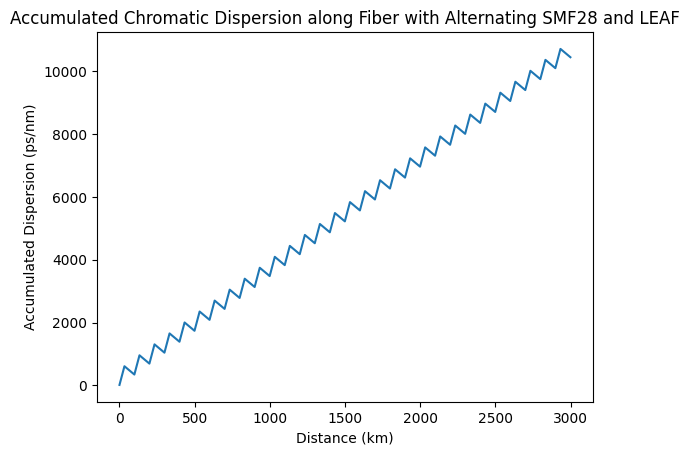

In [34]:

# Example usage in a simulation loop with alternating SMF28 and LEAF fiber within spans


smf28_params = smf28 # Using the smf28 dictionary from the first cell
leaf_params = leaf   # Using the leaf dictionary from the first cell
lambda_signal_nm = 1550 # nm

# Initialize accumulated dispersion array
accumulated_dispersion = np.zeros(length)
current_accumulated_dispersion = 0

for i in range(length):
    # Determine the current span and the position within the span
    current_span = i // span
    position_in_span = i % span

    # Determine which fiber type is used based on the position within the span
    if position_in_span < span/ 3:
        fiber_params = smf28_params
    else:
        fiber_params = leaf_params
    if position_in_span == (span/3)//1 :
        discrete_losses[i] = 0.3


    # Calculate the dispersion for this 1km step using the current fiber parameters
    incremental_dispersion = calculate_accumulated_dispersion(1, fiber_params, lambda_signal_nm)

    # Accumulate the dispersion
    current_accumulated_dispersion += incremental_dispersion

    # Store the accumulated dispersion at this location
    accumulated_dispersion[i] = current_accumulated_dispersion

# Example: Print accumulated dispersion at the end
print(f"Total accumulated dispersion after {length} km: {accumulated_dispersion[-1]:.2f} ps/nm")

# You could potentially plot the accumulated dispersion
plt.plot(np.arange(0, length), accumulated_dispersion)
plt.xlabel("Distance (km)")
plt.ylabel("Accumulated Dispersion (ps/nm)")
plt.title("Accumulated Chromatic Dispersion along Fiber with Alternating SMF28 and LEAF")
plt.show()

## Gain tilt and correction with GE


Text(0, 0.5, 'Amplification (dB)')

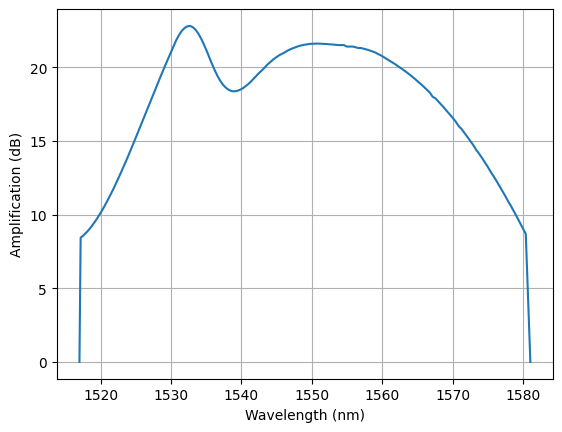

In [35]:
plt.plot(measured_nm,measured_db)
plt.xlabel('Wavelength (nm)')
plt.grid()
plt.ylabel('Amplification (dB)')

In [36]:
channels = 70
signal_length = 5000
channeled_lambdas = np.zeros(channels)
signals = np.zeros((channels, signal_length), dtype=complex)
gain_weights = np.zeros(channels)
channel_power = np.zeros(channels)
total_chrom_dispersion = np.zeros((channels,length))
def find_closest_numpy(data_array, target):
    idx = np.abs(data_array - target).argmin()
    return data_array[idx]

for i in range(channels):
  channel_power = EDFA_total_power-10*np.log10(channels)
  channeled_lambdas[i] = lambda_light + i*0.4e-9
  signals[i] = gen_random_data('16qam', signal_length)
  gain_weights[i] = measured_db[measured_nm.index(find_closest_numpy(measured_nm, channeled_lambdas[i]*1e9))]
print(gain_weights)

[18.56 18.7  18.85 19.03 19.23 19.43 19.63 19.8  20.   20.2  20.37 20.53
 20.67 20.8  20.9  21.   21.12 21.21 21.29 21.36 21.43 21.48 21.52 21.55
 21.58 21.59 21.6  21.6  21.59 21.58 21.57 21.55 21.54 21.52 21.5  21.5
 21.5  21.4  21.4  21.4  21.36 21.3  21.3  21.25 21.2  21.14 21.07 21.
 20.89 20.8  20.68 20.56 20.56 20.44 20.32 20.2  20.06 19.93 19.79 19.65
 19.5  19.34 19.18 19.   18.84 18.66 18.47 18.28 18.   17.88]


In [37]:
#edit this cell
span_layout = {'smf28': 33, 'leaf': 67}
span = span_layout['smf28'] + span_layout['leaf']
cable_types = {'smf28': {'attenuation_per_km': 0.18, 'dispersion': 18}, 'leaf': {'attenuation_per_km': 0.22, 'dispersion': -4}}
power_floor_mW = 1e-25 # Define power_floor_mW
distance_points = np.arange(0, length + 1, 1) # Array of distance points
starting_power_per_channel_dBm = EDFA_total_power - 10 * np.log10(channels)
starting_power_mW = 10**(starting_power_per_channel_dBm / 10)
multi_channel_signal_power_iter = np.full((channels, length + 1), starting_power_mW)
multi_channel_noise_iter = np.zeros((channels, length + 1))

# --- Attenuation Function (Included here for self-containment, or ensure it's run in a preceding cell) ---
def apply_attenuation(power_mW, attenuation_per_km_dB, length_km):
    """Applies attenuation to power (in mW) over a given length of fiber."""
    attenuation_linear = 10**(-attenuation_per_km_dB / 10)
    power_after_attenuation_mW = power_mW * (attenuation_linear ** length_km)
    return power_after_attenuation_mW
# --- End Attenuation Function ---


# Assuming 'span', 'length', 'cable_types', 'span_layout', 'EDFA_total_power',
# 'channeled_lambdas', 'EDFA_noise', 'gain_weights' are defined elsewhere.

for i in range(length): # Loop from 0 to length-1
    # Determine cable type and parameters for the current kilometer (i)
    km_in_current_span = i % span

    segment_start_km_in_span = 0
    current_cable_type_name = None
    current_attenuation_per_km = None
    current_dispersion_per_km = None


    for cable_type_name, segment_length in span_layout.items(): # Iterate over items()
        if km_in_current_span >= segment_start_km_in_span and km_in_current_span < segment_start_km_in_span + segment_length:
            current_cable_type_name = cable_type_name
            current_attenuation_per_km = cable_types[current_cable_type_name]['attenuation_per_km']
            current_dispersion_per_km = cable_types[current_cable_type_name]['dispersion']
            break
        segment_start_km_in_span += segment_length


    if current_cable_type_name is None:
         raise ValueError(f"Could not determine cable type for kilometer {i}. Check span_layout definition.")

    # --- Apply Attenuation for this kilometer segment using the function ---
    # Note: The original loop was from 1 to length+1 and used i-1. Adjusting for 0 to length-1 loop.
    multi_channel_signal_power_iter[:, i+1] = apply_attenuation(multi_channel_signal_power_iter[:, i], current_attenuation_per_km, 1)
    multi_channel_noise_iter[:, i+1] = apply_attenuation(multi_channel_noise_iter[:, i], current_attenuation_per_km, 1)

    # Optional: Apply power floor after attenuation
    multi_channel_signal_power_iter[:, i+1][multi_channel_signal_power_iter[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise_iter[:, i+1][multi_channel_noise_iter[:, i+1] < power_floor_mW] = power_floor_mW
    # --- End Apply Attenuation ---


    if (i + 1) % span == 0:
        const_power_EDFA_with_tilt_saturation(multi_channel_signal_power_iter, multi_channel_noise_iter, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights)
        # Optional: Apply power floor after EDFA
        multi_channel_signal_power_iter[:, i+1][multi_channel_signal_power_iter[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise_iter[:, i+1][multi_channel_noise_iter[:, i+1] < power_floor_mW] = power_floor_mW


multi_channel_signal_power_iter_flat_run = multi_channel_signal_power_iter
multi_channel_noise_iter_flat_run = multi_channel_noise_iter # Corrected variable name

<StemContainer object of 3 artists>

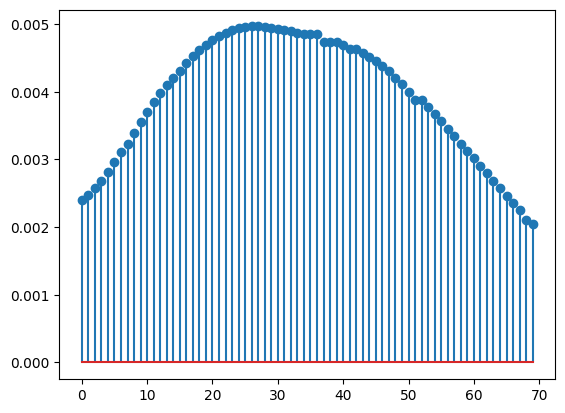

In [38]:
final_powers = np.zeros(channels)
for i in range(channels):
  final_powers[i] = multi_channel_signal_power_iter[i,length-1]
channel_axis = np.arange(0,channels,1)
plt.stem(channel_axis,final_powers)


Running final simulation with new initial values, different cable types, and Gain Equalizers...
Span 1 EDFA/GE Output Total Power: 15.00 dBm
Span 2 EDFA/GE Output Total Power: 15.00 dBm
Span 3 EDFA/GE Output Total Power: 15.00 dBm
Span 4 EDFA/GE Output Total Power: 15.00 dBm
Span 5 EDFA/GE Output Total Power: 15.00 dBm
Span 6 EDFA/GE Output Total Power: 15.00 dBm
Span 7 EDFA/GE Output Total Power: 15.00 dBm
Span 8 EDFA/GE Output Total Power: 15.00 dBm
Span 9 EDFA/GE Output Total Power: 15.00 dBm
Span 10 EDFA/GE Output Total Power: 15.00 dBm
Span 11 EDFA/GE Output Total Power: 15.00 dBm
Span 12 EDFA/GE Output Total Power: 15.00 dBm
Span 13 EDFA/GE Output Total Power: 15.00 dBm
Span 14 EDFA/GE Output Total Power: 15.00 dBm
Span 15 EDFA/GE Output Total Power: 15.00 dBm
Span 16 EDFA/GE Output Total Power: 15.00 dBm
Span 17 EDFA/GE Output Total Power: 15.00 dBm
Span 18 EDFA/GE Output Total Power: 15.00 dBm
Span 19 EDFA/GE Output Total Power: 15.00 dBm
Span 20 EDFA/GE Output Total Power: 15

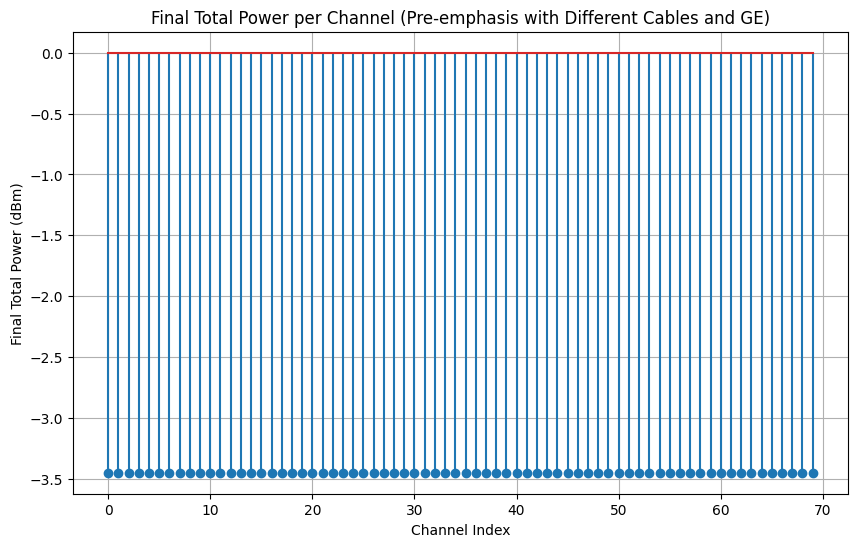


Final Total Output Power (dBm) per Channel:
[-3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804 -3.4509804
 -3.4509804 -3.4509804 -3.4509804 -3.4509804]


In [39]:
# Simple Pre-emphasis Calculation with Different Cable Types and Gain Equalizer - Main Simulation
# edit this cell

# --- Import necessary libraries ---
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting

# --- Define Cable Types and Parameters ---
cable_types = {
    'smf28': {'attenuation_per_km': 0.18, 'dispersion': 18},
    'leaf': {'attenuation_per_km': 0.22, 'dispersion': -4} # Example LEAF parameters
}

# --- Define Span Layout (e.g., 80km SMF28, 20km LEAF per 100km span) ---
# List of tuples: (cable_type_name, length_in_km)
span_layout = [('smf28', 33), ('leaf', 67)]
total_span_length = sum(length for _, length in span_layout)
# Assuming span is defined elsewhere, ensure total_span_length matches
# if total_span_length != span:
#     raise ValueError(f"Sum of lengths in span_layout ({total_span_length} km) must equal span length ({span} km).")


# Assuming EDFA_total_power, EDFA_noise, channels, channeled_lambdas, gain_weights are defined elsewhere
# Assuming length and span are defined elsewhere

epsilon = 1e-20 # Local epsilon for numerical stability
power_floor_mW = 1e-25


# --- Run flat launch simulation with different cable types for Simple Pre-emphasis ---
initial_flat_power_mW = 10**((EDFA_total_power - 10 * np.log10(channels)) / 10)
multi_channel_signal_power_flat = np.full((channels, length + 1), initial_flat_power_mW)
multi_channel_noise_flat = np.zeros((channels, length + 1))


for i in range(length):
    # Determine cable type for the current kilometer (i)
    km_in_current_span = i % span

    segment_start_km_in_span = 0
    current_cable_type_name = None
    current_attenuation_per_km = None

    for cable_type_name, segment_length in span_layout:
        if km_in_current_span >= segment_start_km_in_span and km_in_current_span < segment_start_km_in_span + segment_length:
            current_cable_type_name = cable_type_name
            current_attenuation_per_km = cable_types[current_cable_type_name]['attenuation_per_km']
            break
        segment_start_km_in_span += segment_length

    if current_cable_type_name is None:
         raise ValueError(f"Could not determine cable type for kilometer {i}. Check span_layout definition.")

    attenuation_linear_per_km = 10**(-current_attenuation_per_km / 10)

    multi_channel_signal_power_flat[:, i+1] = multi_channel_signal_power_flat[:, i] * attenuation_linear_per_km
    multi_channel_noise_flat[:, i+1] = multi_channel_noise_flat[:, i] * attenuation_linear_per_km

    multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW


    if (i + 1) % span == 0:
        # Apply EDFA in the flat launch simulation for pre-emphasis
        # Assuming const_power_EDFA_with_tilt_saturation is defined
        const_power_EDFA_with_tilt_saturation(multi_channel_signal_power_flat, multi_channel_noise_flat, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights) # Using saturation model
        multi_channel_signal_power_flat[:, i+1][multi_channel_signal_power_flat[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise_flat[:, i+1][multi_channel_noise_flat[:, i+1] < power_floor_mW] = power_floor_mW

        # Note: GE is NOT applied in the flat launch simulation used for pre-emphasis calculation


# Calculate simple pre-emphasis
final_total_power_flat_mW = multi_channel_signal_power_flat[:, length] + multi_channel_noise_flat[:, length]
final_total_power_flat_mW[final_total_power_flat_mW < power_floor_mW] = power_floor_mW
required_pre_emphasis_linear = (initial_flat_power_mW + epsilon) / (final_total_power_flat_mW + epsilon)

# Scale for total power constraint
target_total_launch_power_mW = 10**(EDFA_total_power / 10)
sum_initial_flat_times_preemphasis = np.sum(initial_flat_power_mW * required_pre_emphasis_linear)
scaling_factor = target_total_launch_power_mW / (sum_initial_flat_times_preemphasis + epsilon)
new_initial_values_mW = initial_flat_power_mW * required_pre_emphasis_linear * scaling_factor
new_initial_values_dBm = 10 * np.log10(new_initial_values_mW + epsilon)


# --- Run final simulation with new initial values, different cable types, and including GE ---
print("\nRunning final simulation with new initial values, different cable types, and Gain Equalizers...")
multi_channel_signal_power = np.full((channels, length + 1), 0.0)
multi_channel_noise = np.zeros((channels, length + 1))
multi_channel_signal_power[:, 0] = new_initial_values_mW

for i in range(length):
    # Determine cable type for the current kilometer (i) in the final simulation
    km_in_current_span = i % span

    segment_start_km_in_span = 0
    current_cable_type_name = None
    current_attenuation_per_km = None
    current_dispersion_per_km = None


    for cable_type_name, segment_length in span_layout:
        if km_in_current_span >= segment_start_km_in_span and km_in_current_span < segment_start_km_in_span + segment_length:
            current_cable_type_name = cable_type_name
            current_attenuation_per_km = cable_types[current_cable_type_name]['attenuation_per_km']
            current_dispersion_per_km = cable_types[current_cable_type_name]['dispersion']
            break
        segment_start_km_in_span += segment_length


    if current_cable_type_name is None:
         raise ValueError(f"Could not determine cable type for kilometer {i}. Check span_layout definition.")

    attenuation_linear_per_km = 10**(-current_attenuation_per_km / 10)


    multi_channel_signal_power[:, i+1] = multi_channel_signal_power[:, i] * attenuation_linear_per_km
    multi_channel_noise[:, i+1] = multi_channel_noise[:, i] * attenuation_linear_per_km
    multi_channel_signal_power[:, i+1][multi_channel_signal_power[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise[:, i+1][multi_channel_noise[:, i+1] < power_floor_mW] = power_floor_mW

    if (i + 1) % span == 0:
        # Apply EDFA with Saturation
        # Assuming const_power_EDFA_with_tilt_saturation is defined
        const_power_EDFA_with_tilt_saturation(multi_channel_signal_power, multi_channel_noise, EDFA_total_power, channeled_lambdas, EDFA_noise, i+1, gain_weights) # Using saturation model
        multi_channel_signal_power[:, i+1][multi_channel_signal_power[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise[:, i+1][multi_channel_noise[:, i+1] < power_floor_mW] = power_floor_mW
        total_output_power_after_span_mW = np.sum(multi_channel_signal_power[:, i+1]) + np.sum(multi_channel_noise[:, i+1])
        total_output_power_after_span_dBm = 10 * np.log10(total_output_power_after_span_mW + epsilon) # Use local epsilon
        print(f"Span {int((i+1)/span)} EDFA/GE Output Total Power: {total_output_power_after_span_dBm:.2f} dBm")
        # Apply GE after EDFA (assuming apply_gain_equalizer is defined)
        apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, EDFA_total_power, i+1) # epsilon removed
        multi_channel_signal_power[:, i+1][multi_channel_signal_power[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise[:, i+1][multi_channel_noise[:, i+1] < power_floor_mW] = power_floor_mW

        # # Debug Print: Total Output Power after EDFA/GE (Optional)



# --- Plot final total power ---

final_signal_powers_mW = multi_channel_signal_power[:, length]
final_noise_powers_mW = multi_channel_noise[:, length]
final_total_powers_mW = final_signal_powers_mW + final_noise_powers_mW

final_total_powers_mW[final_total_powers_mW < power_floor_mW] = power_floor_mW
final_total_powers_dBm = 10 * np.log10(final_total_powers_mW + epsilon) # Use local epsilon

channel_axis = np.arange(0, channels, 1)
plt.figure(figsize=(10, 6))
plt.stem(channel_axis, final_total_powers_dBm)
plt.xlabel('Channel Index')
plt.ylabel('Final Total Power (dBm)')
plt.title('Final Total Power per Channel (Pre-emphasis with Different Cables and GE)')
plt.grid(True)
plt.show()

# Print final total output power in dBm
print("\nFinal Total Output Power (dBm) per Channel:")
print(final_total_powers_dBm)

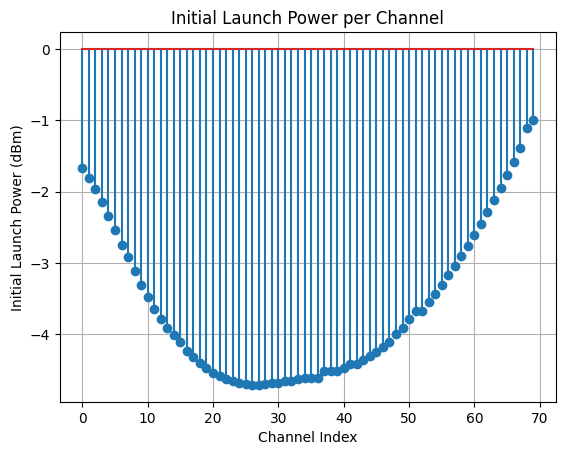

In [40]:

plt.stem(channel_axis, new_initial_values_dBm)
plt.xlabel('Channel Index')
plt.ylabel('Initial Launch Power (dBm)')
plt.title('Initial Launch Power per Channel')
plt.grid(True)
plt.show()

Running simulation with pre-emphasized initial values, EDFA saturation, and GE (Revised GE) to get power levels for plot...
Using pre-emphasized initial values for the plot simulation.


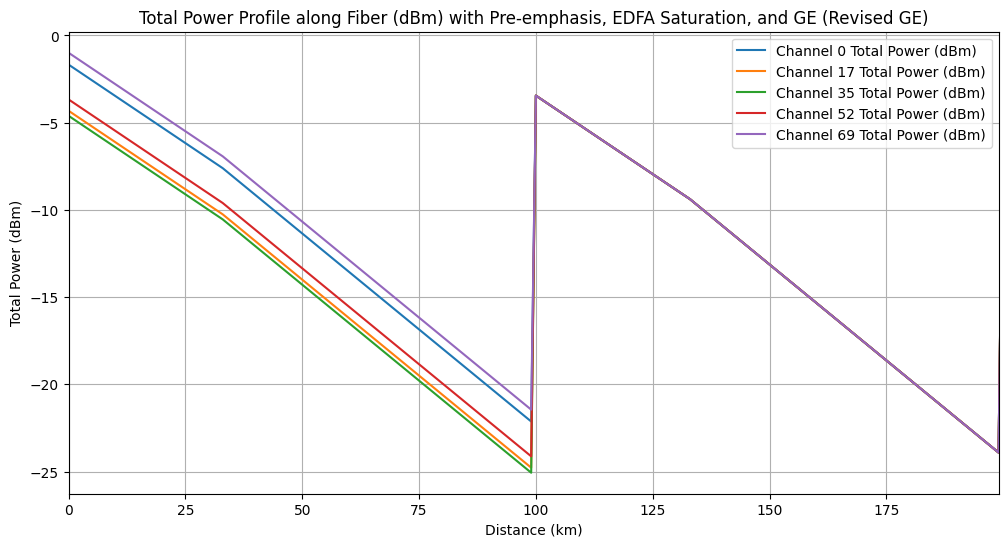

In [41]:
# Plot Power Profile along Fiber (dBm) with Pre-emphasis, EDFA Saturation, and GE (Revised GE - Attempt 3)

# Assuming length, span, EDFA_total_power, EDFA_noise, attenuation, channels,
# channeled_lambdas, gain_weights, power_floor_mW,
# cable_types, span_layout are defined elsewhere.
# Assuming const_power_EDFA_with_tilt_saturation and apply_gain_equalizer functions are defined and available.
# Assuming new_initial_values_mW is available from a previous cell execution (e.g., cell 9a4473f9)

print("Running simulation with pre-emphasized initial values, EDFA saturation, and GE (Revised GE) to get power levels for plot...")

# Use the calculated new_initial_values_mW from the pre-emphasis calculation
if 'new_initial_values_mW' in locals():
    initial_values_for_plot_mW = new_initial_values_mW
    print("Using pre-emphasized initial values for the plot simulation.")
else:
    # Fallback to flat launch if pre-emphasized values are not found
    print("Pre-emphasized initial values not found. Using flat launch for the plot simulation.")
    initial_flat_power_mW = 10**((EDFA_total_power - 10 * np.log10(channels)) / 10)
    initial_values_for_plot_mW = np.full(channels, initial_flat_power_mW)


multi_channel_signal_power_plot = np.full((channels, length + 1), 0.0)
multi_channel_noise_power_plot = np.zeros((channels, length + 1))
multi_channel_signal_power_plot[:, 0] = initial_values_for_plot_mW # Set the initial signal power in mW

# Use a small value for log10 safety
log_epsilon = 1e-20


for i in range(length):
    # Determine cable type for the current kilometer (i)
    km_in_current_span = i % span

    segment_start_km_in_span = 0
    current_cable_type_name = None
    current_attenuation_per_km = None

    for cable_type_name, segment_length in span_layout:
        if km_in_current_span >= segment_start_km_in_span and km_in_current_span < segment_start_km_in_span + segment_length:
            current_cable_type_name = cable_type_name
            current_attenuation_per_km = cable_types[current_cable_type_name]['attenuation_per_km']
            break
        segment_start_km_in_span += segment_length


    if current_cable_type_name is None:
         raise ValueError(f"Could not determine cable type for kilometer {i}. Check span_layout definition.")

    attenuation_linear_per_km = 10**(-current_attenuation_per_km / 10)

    multi_channel_signal_power_plot[:, i+1] = multi_channel_signal_power_plot[:, i] * attenuation_linear_per_km
    multi_channel_noise_power_plot[:, i+1] = multi_channel_noise_power_plot[:, i] * attenuation_linear_per_km

    multi_channel_signal_power_plot[:, i+1][multi_channel_signal_power_plot[:, i+1] < power_floor_mW] = power_floor_mW
    multi_channel_noise_power_plot[:, i+1][multi_channel_noise_power_plot[:, i+1] < power_floor_mW] = power_floor_mW


    if (i + 1) % span == 0:

        total_power_after_edfa_mW = np.sum(multi_channel_signal_power_plot[:, i+1]) + np.sum(multi_channel_noise_power_plot[:, i+1])
        total_power_after_edfa_dBm = 10 * np.log10(total_power_after_edfa_mW + log_epsilon)

        channels_to_debug_after_edfa = [0, channels // 2, channels - 1]
        power_after_edfa_debug_dBm = 10 * np.log10(multi_channel_signal_power_plot[channels_to_debug_after_edfa, i+1] + multi_channel_noise_power_plot[channels_to_debug_after_edfa, i+1] + log_epsilon)



        # Apply GE after EDFA
        apply_gain_equalizer(multi_channel_signal_power_plot, multi_channel_noise_power_plot, EDFA_total_power, i+1) # Removed 'channels'
        multi_channel_signal_power_plot[:, i+1][multi_channel_signal_power_plot[:, i+1] < power_floor_mW] = power_floor_mW
        multi_channel_noise_power_plot[:, i+1][multi_channel_noise_power_plot[:, i+1] < power_floor_mW] = power_floor_mW

        total_output_power_after_ge_mW = np.sum(multi_channel_signal_power_plot[:, i+1]) + np.sum(multi_channel_noise_power_plot[:, i+1])
        total_output_power_after_ge_dBm = 10 * np.log10(total_output_power_after_ge_mW + log_epsilon)



# --- Plotting ---
distance_km = np.arange(0, length + 1, 1)

plt.figure(figsize=(12, 6))

# Plot Total Power in dBm for a few representative channels
channels_to_plot = [0, channels // 4, channels // 2, channels * 3 // 4, channels - 1] # Plot a few channels

for channel_index in channels_to_plot:
    total_power_this_channel_mW = multi_channel_signal_power_plot[channel_index, :] + multi_channel_noise_power_plot[channel_index, :]
    total_power_this_channel_dBm = 10 * np.log10(total_power_this_channel_mW + log_epsilon)
    plt.plot(distance_km, total_power_this_channel_dBm, label=f'Channel {channel_index} Total Power (dBm)')


plt.xlabel('Distance (km)')
plt.ylabel('Total Power (dBm)')
plt.xlim(0,199)
plt.title('Total Power Profile along Fiber (dBm) with Pre-emphasis, EDFA Saturation, and GE (Revised GE)')
plt.legend()
plt.grid(True)
# plt.ylim([-60, 30]) # Adjust y-limit based on expected range
plt.show()